In [366]:
import numpy as np
import pandas as pd
import random
from math import*
import time 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

# Q1

PART A

In [375]:
iris = datasets.load_iris()
Y = np.reshape(iris.target,(-1,1))
X = np.reshape(iris.data,(-1,4))
target_names = iris.target_names

In [368]:
def euclidean(a,b):
    return sqrt(sum(pow(x-y,2) for x,y in zip(a,b)))

def manhattan(a,b):
    return sum(abs(x-y) for x,y in zip(a,b))

def square_rooted(a):
    return sqrt(sum([x*x for x in a]))
  
def cosine(x,y):
    num= sum(a*b for a,b in zip(x,y))
    den= square_rooted(x)*square_rooted(y)
    return num/den

def KNN_predict(data_type, train_X, train_Y, test_X, K, distance_metric):
    r,c = test_X.shape
    row,col= train_X.shape
    
    predictions = np.zeros((r,1))
    
    for i in range(0,r):
        
        distances = np.zeros((1,row))
        
        if distance_metric =='Euclidean':
            for j in range(0,row):
                distances[0,j] = euclidean(train_X[j,:],test_X[i,:])
        
        elif distance_metric =='Manhattan':
            for j in range(0,row):
                distances[0,j] = manhattan(train_X[j,:],test_X[i,:])
                
        elif distance_metric =='Cosine':
            for j in range(0,row):
                distances[0,j] = cosine(train_X[j,:],test_X[i,:])
        indices = np.argpartition(distances,K)[0][:K]
        pred_temp = train_Y[indices,:]
        
        if data_type == 'classification':
            elements, repeats = np.unique(pred_temp, return_counts=True)
            index = repeats.argmax()
            predictions[i,0] = int(elements[index])
        
        elif data_type == 'regression':
            numerator = np.sum(pred_temp[:,0])
            denominator = K
            predictions[i,0] = int(numerator/denominator)
    
    return np.around(predictions)

In [369]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.35, random_state = 4)
predictions = KNN_predict('classification', train_X, train_Y, test_X,3, 'Euclidean')
mean_squared_error(test_Y,predictions)

0.018867924528301886

In [370]:
boston = datasets.load_boston()
Y_r = np.reshape(boston.target,(-1,1))
X_r = np.reshape(boston.data,(-1,13))
train_X,test_X,train_Y,test_Y = train_test_split(X_r,Y_r,test_size = 0.35, random_state = 3)
predictions = KNN_predict('regression', train_X, train_Y, test_X,3, 'Manhattan')
mean_squared_error(test_Y,predictions)

35.48893258426966

PART B

In [371]:
random_data = datasets.make_classification(n_samples=100, n_features=15, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
X =random_data[0]
Y=np.reshape(random_data[1],(-1,1))

Text(0, 0.5, 'runtimes')

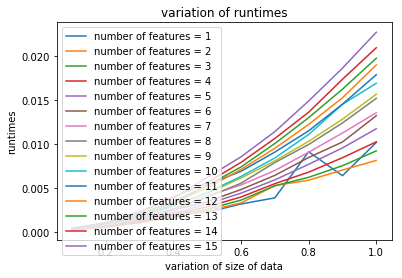

In [372]:
r,c = X.shape
runtime = np.zeros((c,10))
for i in range(1,c+1):
    features = np.arange(i)
    x = X[:,features]
    y = Y
    k=0
    for j in np.linspace(0.1,1,10):
        r_temp = int(j*r)
        a = x[0:r_temp,:]
        b = y[0:r_temp,:]
        train_x,test_x,train_y,test_y = train_test_split(a,b,test_size = 0.3, random_state = 3) 
        start = time.time()
        predict = KNN_predict('classification', train_x, train_y, test_x,3, 'Manhattan')
        stop = time.time()
        duration = stop - start
        runtime[i-1,k] = duration
        k=k+1
        
for i in range (0,c):
    plt.plot(np.linspace(0.1,1,10),runtime[i,:],label = 'number of features = '+ str(i+1))
    plt.legend(loc=2)
plt.title('variation of runtimes')
plt.xlabel('variation of size of data')
plt.ylabel('runtimes')



AS WE KNOW THAT KNN IS NON-PARAMETRIC, AS THE SIZE OF THE TRAINING INSTANCES INCREASE THE COMPUTATION TIME ALSO INCREASES. IT CAN BE SEEN FROM THE ABOVE GRAPH. MOREOVER AS THE NO. OF FEATURES INCREASE THE COMPUTATIONAL TIME ALSO INCREASES. 

# Q2

PART A

In [365]:
data = pd.read_excel('Real_estate_valuation_data_set.xlsx')
columns = ["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]
data_features = data[columns]
y = data["Y house price of unit area"]

In [303]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [310]:
r,c = data_features.shape
fold = 5
row_set = int(r/fold)
crossfold_dict = dict()
for i in range (0,fold):
    if i ==(fold-1):
        crossfold_dict[str(i)]= data_features.iloc[row_set*i:,:].reset_index(drop=True)
    else:   
        crossfold_dict[str(i)]= data_features.iloc[row_set*i:row_set*(i+1),:].reset_index(drop=True)

In [305]:
crossfold_dict_target = dict()
r= len(y)
row_set = int(r/fold)
for i in range (0,fold):
    if i ==(fold-1):
        crossfold_dict_target[str(i)]= y.iloc[row_set*i:].reset_index(drop=True)
    else:   
        crossfold_dict_target[str(i)]= y.iloc[row_set*i:row_set*(i+1)].reset_index(drop=True)

In [306]:
def dict_rolling(dictionary):
    l = len(dictionary)
    for k in range (0,l):
        if k == l-1:
            dictionary[str(k)] = dictionary ['0']
        else:
            dictionary[str(k)] = dictionary [str(k+1)]

In [319]:
import math
for i in range(0,5):
    dict_rolling(crossfold_dict)
    dict_rolling(crossfold_dict_target)
    
    train_frames = [crossfold_dict['0'],crossfold_dict['1'],crossfold_dict['2']]
    train_frames_target = [crossfold_dict_target['0'],crossfold_dict_target['1'],crossfold_dict_target['2']]
    
    train_X = pd.concat(train_frames).reset_index(drop=True)
    train_Y = pd.concat(train_frames_target).reset_index(drop=True)
    train_X = train_X.values
    train_Y = np.reshape(train_Y.values,(-1,1))
    
    validation_X = crossfold_dict['3'].values
    validation_Y = np.reshape(crossfold_dict_target['3'].values,(-1,1))
    
    test_X = crossfold_dict['4'].values
    test_Y = np.reshape(crossfold_dict_target['4'].values,(-1,1))
    
    best_test_error = 99999
    best_validation_error = 99999
    best_train_error = 99999
    optimum_K_train = 0
    optimum_K_validation = 0
    optimum_K_test = 0
    
    for K in np.linspace(1,10,10):
        pred_train = KNN_predict('regression', train_X, train_Y, train_X, int(K), 'Manhattan')
        train_error = math.sqrt(mean_squared_error(pred_train,train_Y))
        
        pred_val = KNN_predict('regression', train_X, train_Y, validation_X, int(K), 'Manhattan')
        val_error = math.sqrt(mean_squared_error(pred_val,validation_Y))
        
        pred_test = KNN_predict('regression', train_X, train_Y, test_X, int(K), 'Manhattan')
        test_error = math.sqrt(mean_squared_error(pred_test,test_Y))
        
        if best_test_error > test_error:
            best_test_error = test_error
            optimum_K_test = K
            
        if best_validation_error > val_error:
            best_validation_error = val_error
            optimum_K_validation = K
        
        if best_train_error > train_error:
            best_train_error = train_error
            optimum_K_train = K
        
    print('fold_number = '+ str(i+1))
    print('best_train_error =', str(best_train_error)  ,   'best_validation_error =', str(best_validation_error)   ,   'best_test_error =',str(best_test_error))
    print('optimum_K_train =', str(optimum_K_train)  ,   'optimum_K_validation =', str(optimum_K_validation)   ,   'optimum_K_test =',str(optimum_K_test))
    

fold_number = 1
best_train_error = 1.446062779057538 best_validation_error = 6.472877222293323 best_test_error = 1.51569029592814
optimum_K_train = 1.0 optimum_K_validation = 4.0 optimum_K_test = 1.0
fold_number = 2
best_train_error = 1.9702487152641415 best_validation_error = 7.689064137921673 best_test_error = 0.5259138388116994
optimum_K_train = 1.0 optimum_K_validation = 1.0 optimum_K_test = 1.0
fold_number = 3
best_train_error = 2.5321690306928564 best_validation_error = 8.233542342891978 best_test_error = 0.6927323067249624
optimum_K_train = 1.0 optimum_K_validation = 5.0 optimum_K_test = 1.0
fold_number = 4
best_train_error = 2.676639684380399 best_validation_error = 10.93503543661382 best_test_error = 2.385615809533814
optimum_K_train = 1.0 optimum_K_validation = 10.0 optimum_K_test = 1.0
fold_number = 5
best_train_error = 1.446062779057538 best_validation_error = 6.472877222293323 best_test_error = 1.51569029592814
optimum_K_train = 1.0 optimum_K_validation = 4.0 optimum_K_tes

AS OBSERVED FROM THE PREVIOUS ASSIGNMENTS AND COMPARING WITH THE ERROR VALUES OF KNN, THE ERROR VALUES OF KNN ARE LESSER COMPARED TO THAT OF THE PREVIOUS ONES

PART B

In [320]:
data = pd.read_excel('Real_estate_valuation_data_set.xlsx')
data = normalize(data)
columns = ["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]
data_features = data[columns]
y = data["Y house price of unit area"]

In [321]:
import math
for i in range(0,5):
    dict_rolling(crossfold_dict)
    dict_rolling(crossfold_dict_target)
    
    train_frames = [crossfold_dict['0'],crossfold_dict['1'],crossfold_dict['2']]
    train_frames_target = [crossfold_dict_target['0'],crossfold_dict_target['1'],crossfold_dict_target['2']]
    
    train_X = pd.concat(train_frames).reset_index(drop=True)
    train_Y = pd.concat(train_frames_target).reset_index(drop=True)
    train_X = train_X.values
    train_Y = np.reshape(train_Y.values,(-1,1))
    
    validation_X = crossfold_dict['3'].values
    validation_Y = np.reshape(crossfold_dict_target['3'].values,(-1,1))
    
    test_X = crossfold_dict['4'].values
    test_Y = np.reshape(crossfold_dict_target['4'].values,(-1,1))
    
    best_test_error = 99999
    best_validation_error = 99999
    best_train_error = 99999
    optimum_K_train = 0
    optimum_K_validation = 0
    optimum_K_test = 0
    
    for K in np.linspace(1,10,10):
        pred_train = KNN_predict('regression', train_X, train_Y, train_X, int(K), 'Manhattan')
        train_error = math.sqrt(mean_squared_error(pred_train,train_Y))
        
        pred_val = KNN_predict('regression', train_X, train_Y, validation_X, int(K), 'Manhattan')
        val_error = math.sqrt(mean_squared_error(pred_val,validation_Y))
        
        pred_test = KNN_predict('regression', train_X, train_Y, test_X, int(K), 'Manhattan')
        test_error = math.sqrt(mean_squared_error(pred_test,test_Y))
        
        if best_test_error > test_error:
            best_test_error = test_error
            optimum_K_test = K
            
        if best_validation_error > val_error:
            best_validation_error = val_error
            optimum_K_validation = K
        
        if best_train_error > train_error:
            best_train_error = train_error
            optimum_K_train = K
        
    print('fold_number = '+ str(i+1))
    print('best_train_error =', str(best_train_error)  ,   'best_validation_error =', str(best_validation_error)   ,   'best_test_error =',str(best_test_error))
    print('optimum_K_train =', str(optimum_K_train)  ,   'optimum_K_validation =', str(optimum_K_validation)   ,   'optimum_K_test =',str(optimum_K_test))
    

fold_number = 1
best_train_error = 1.9702487152641415 best_validation_error = 7.689064137921673 best_test_error = 0.5259138388116994
optimum_K_train = 1.0 optimum_K_validation = 1.0 optimum_K_test = 1.0
fold_number = 2
best_train_error = 2.5321690306928564 best_validation_error = 8.233542342891978 best_test_error = 0.6927323067249624
optimum_K_train = 1.0 optimum_K_validation = 5.0 optimum_K_test = 1.0
fold_number = 3
best_train_error = 2.676639684380399 best_validation_error = 10.93503543661382 best_test_error = 2.385615809533814
optimum_K_train = 1.0 optimum_K_validation = 10.0 optimum_K_test = 1.0
fold_number = 4
best_train_error = 1.446062779057538 best_validation_error = 6.472877222293323 best_test_error = 1.51569029592814
optimum_K_train = 1.0 optimum_K_validation = 4.0 optimum_K_test = 1.0
fold_number = 5
best_train_error = 1.9702487152641415 best_validation_error = 7.689064137921673 best_test_error = 0.5259138388116994
optimum_K_train = 1.0 optimum_K_validation = 1.0 optimum_K_

PART C

In [338]:
data = pd.read_excel('Real_estate_valuation_data_set.xlsx')
columns = ["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]
data_features = data[columns]
y = data["Y house price of unit area"]

In [339]:
train_X,test_X,train_Y,test_Y = train_test_split(data_features,y,test_size =0.2,random_state = 9)
train_X = train_X.values
train_Y = np.reshape(train_Y.values,(-1,1))
test_X = test_X.values
test_Y = np.reshape(test_Y.values,(-1,1))

In [343]:
rmse_error_test = np.zeros((15,1))
rmse_error_train = np.zeros((15,1))
for K in np.linspace(1,15,15):
    predict_test = KNN_predict('regression', train_X, train_Y, test_X, int(K), 'Manhattan')
    rmse_error_test[int(K-1),0] = math.sqrt(mean_squared_error(predict_test,test_Y))
    predict_train = KNN_predict('regression', train_X, train_Y, train_X, int(K), 'Manhattan')
    rmse_error_train[int(K-1),0] = math.sqrt(mean_squared_error(predict_train,train_Y))

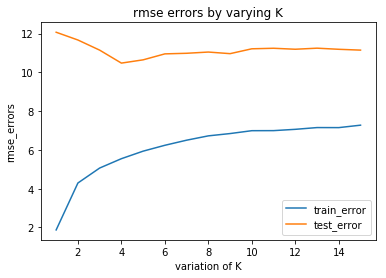

In [346]:
plt.plot(np.linspace(1,15,15),rmse_error_train,label = 'train_error')
plt.plot(np.linspace(1,15,15),rmse_error_test, label = 'test_error')
plt.legend(loc=4)
plt.xlabel('variation of K')
plt.ylabel('rmse_errors')
plt.title('rmse errors by varying K')
plt.show()

THE TRAIN ERROR INCREASES AS WE INCREASE THE VALUE OF K AND GETS SATURATED AFTER A POINT. THE ERROR INCREASES DUE TO INCREASE IN THE NO. OF NEIGHBOURS FOR WHICH WE CALCULATE THE AVERAGE.

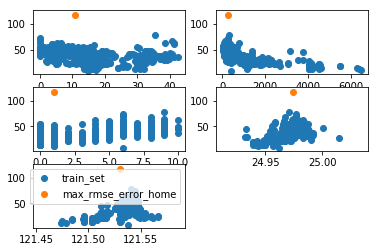

In [362]:
predict_test = KNN_predict('regression', train_X, train_Y, test_X, 4, 'Manhattan')
difference = test_Y - predict_test
index = difference.argmax()
for i in range (0,5):
    plt.subplot(3,2,i+1)
    plt.scatter(train_X[:,i], train_Y , label = 'train_set')
    plt.scatter(test_X[:,i][index],test_Y[index], label = 'max_rmse_error_home')
plt.legend()
plt.show()

AS OBSERVED FROM THE ABOVE GRAPHS, THE HOME HAVING THE MAXIMUM RMSE ERROR(MARKED IN ORANGE) IS AN OUTLIER. THEREFORE WE CANNOT AVERAGE OUT ITS NEIGHBOURS' OUTPUT TO GET THE OUTPUT OF THAT OUTLIER..
IN ORDER TO IMPROVE THE PREDICTION OF THE OUTLIER WE CAN ADD SOME TRAINING DATA POINTS NEARBY OF THAT OUTLIER SO THAT WE CAN USE KNN TO PREDICT THE VALUE OF THE OUTLIER ACCURATELY

# Q3


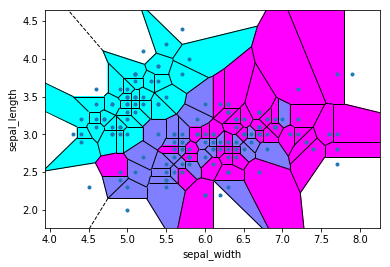

In [389]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm

iris = datasets.load_iris()
Y = iris.target
X = np.reshape(iris.data,(-1,4))[:,[0,1]]

vor = Voronoi(X)

norm = mpl.colors.Normalize(vmin=0, vmax=2, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.cool )

voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(Y[r]))

plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.show()

FROM THE ABOVE DIAGRAM THE INFORMATION WE GET IS ABOUT THE REGIONS OF DIFFERENT CLASSES. MOREOVER IF WE HAVE A TEST DATA/ POINT, WE MAY ALSO KNOW WHAT WOULD THE KNN PREDICT THE TEST DATA AS, FROM THE ABOVE GRAPH. WE WOULD ALSO GENERATE DATA REQUIRED USING THE ABOVE GRAPH 

CITATION: https://stackoverflow.com/questions/41244322/how-to-color-voronoi-according-to-a-color-scale-and-the-area-of-each-cell